In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv('/content/drive/MyDrive/meta learning assignment/physionet_A_N.csv')
df.head()
 

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269,CLASS
0,-127.0,-267.0,-241.0,-229.0,-215.0,-201.0,-253.0,-273.0,-226.0,-172.0,...,-29.0,-22.0,-19.0,-22.0,-43.0,-53.0,-23.0,22.0,-31.0,N
1,-41.0,663.0,-39.0,-113.0,-81.0,-67.0,-45.0,34.0,82.0,62.0,...,-22.0,42.0,104.0,32.0,2.0,2.0,-13.0,-16.0,6.0,N
2,7.0,7.0,12.0,18.0,36.0,80.0,0.0,-19.0,418.0,248.0,...,-22.0,-33.0,-31.0,-34.0,-11.0,1.0,-8.0,12.0,62.0,N
3,128.0,268.0,244.0,209.0,194.0,234.0,203.0,188.0,211.0,228.0,...,-70.0,-62.0,-44.0,393.0,-74.0,-84.0,-65.0,-30.0,-6.0,N
4,13.0,54.0,80.0,56.0,-36.0,1469.0,-199.0,-180.0,-177.0,-126.0,...,-15.0,-37.0,-50.0,-21.0,30.0,17.0,1571.0,-165.0,-201.0,N


In [3]:
df.shape

(18370, 271)

In [4]:
df.describe

<bound method NDFrame.describe of         TS_0   TS_1   TS_2   TS_3   TS_4    TS_5   TS_6   TS_7   TS_8   TS_9  \
0     -127.0 -267.0 -241.0 -229.0 -215.0  -201.0 -253.0 -273.0 -226.0 -172.0   
1      -41.0  663.0  -39.0 -113.0  -81.0   -67.0  -45.0   34.0   82.0   62.0   
2        7.0    7.0   12.0   18.0   36.0    80.0    0.0  -19.0  418.0  248.0   
3      128.0  268.0  244.0  209.0  194.0   234.0  203.0  188.0  211.0  228.0   
4       13.0   54.0   80.0   56.0  -36.0  1469.0 -199.0 -180.0 -177.0 -126.0   
...      ...    ...    ...    ...    ...     ...    ...    ...    ...    ...   
18365  535.0 -186.0  -56.0  -37.0   51.0   156.0  188.0  -46.0 -108.0 -119.0   
18366 -278.0 -456.0 -410.0 -372.0 -295.0  -169.0 -117.0 -103.0 -187.0 -159.0   
18367  -45.0  -56.0  -69.0  -62.0 -474.0    28.0  -24.0  -24.0  -26.0  -14.0   
18368  -26.0  -13.0   63.0   20.0   -3.0   -21.0  -19.0  -82.0 -163.0 -239.0   
18369    5.0  -70.0  -95.0 -185.0 -122.0    62.0   79.0   87.0   97.0   43.0   

     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18370 entries, 0 to 18369
Columns: 271 entries, TS_0 to CLASS
dtypes: float64(270), object(1)
memory usage: 38.0+ MB


In [6]:
#a)
#1.checking if the features are Categorical, Ordinal or Continous
def get_feature_type(df, col):
    # Check if the feature is categorical
    if df[col].dtype == "object":
        return "categorical"
    # Check if the feature is ordinal
    elif df[col].dtype == "int64" or df[col].dtype == "float64":
        # Check if the feature has a finite set of unique values
        if len(df[col].unique()) < 50:
            return "ordinal"
        # If the feature has a large number of unique values, it is probably continuous
        else:
            return "continuous"
    # Return "other" for any other data types
    else:
        return "other"


In [7]:
# Get the list of column names
col_names = df.columns

# Initialize an empty dictionary to store the feature types
feature_types = {}

# Iterate over the column names
for col in col_names:
    # Get the feature type
    feature_type = get_feature_type(df, col)
    # Store the feature type in the dictionary
    feature_types[col] = feature_type
    
# Print the feature types
print(feature_types)


{'TS_0': 'continuous', 'TS_1': 'continuous', 'TS_2': 'continuous', 'TS_3': 'continuous', 'TS_4': 'continuous', 'TS_5': 'continuous', 'TS_6': 'continuous', 'TS_7': 'continuous', 'TS_8': 'continuous', 'TS_9': 'continuous', 'TS_10': 'continuous', 'TS_11': 'continuous', 'TS_12': 'continuous', 'TS_13': 'continuous', 'TS_14': 'continuous', 'TS_15': 'continuous', 'TS_16': 'continuous', 'TS_17': 'continuous', 'TS_18': 'continuous', 'TS_19': 'continuous', 'TS_20': 'continuous', 'TS_21': 'continuous', 'TS_22': 'continuous', 'TS_23': 'continuous', 'TS_24': 'continuous', 'TS_25': 'continuous', 'TS_26': 'continuous', 'TS_27': 'continuous', 'TS_28': 'continuous', 'TS_29': 'continuous', 'TS_30': 'continuous', 'TS_31': 'continuous', 'TS_32': 'continuous', 'TS_33': 'continuous', 'TS_34': 'continuous', 'TS_35': 'continuous', 'TS_36': 'continuous', 'TS_37': 'continuous', 'TS_38': 'continuous', 'TS_39': 'continuous', 'TS_40': 'continuous', 'TS_41': 'continuous', 'TS_42': 'continuous', 'TS_43': 'continuous

In [8]:
df.columns


Index(['TS_0', 'TS_1', 'TS_2', 'TS_3', 'TS_4', 'TS_5', 'TS_6', 'TS_7', 'TS_8',
       'TS_9',
       ...
       'TS_261', 'TS_262', 'TS_263', 'TS_264', 'TS_265', 'TS_266', 'TS_267',
       'TS_268', 'TS_269', 'CLASS'],
      dtype='object', length=271)

In [9]:
#2.Finding any relations or trends considering multiple features
corr = df.corr()
corr

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_260,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269
TS_0,1.000000,0.774116,0.658081,0.573501,0.488359,0.399230,0.341767,0.267005,0.203599,0.151398,...,0.002641,-0.000474,-0.002553,-0.005670,0.003920,-0.016622,0.002306,-0.015019,-0.009364,0.005079
TS_1,0.774116,1.000000,0.814314,0.713349,0.609461,0.495654,0.412432,0.319181,0.259837,0.221407,...,-0.007304,-0.003310,-0.013585,-0.007375,-0.003186,-0.007931,-0.005157,-0.011242,-0.014081,-0.007091
TS_2,0.658081,0.814314,1.000000,0.827322,0.709307,0.598654,0.502982,0.373569,0.291723,0.246847,...,-0.010530,-0.002396,-0.010774,-0.000720,-0.002831,-0.003122,-0.003879,-0.010436,-0.018494,-0.003962
TS_3,0.573501,0.713349,0.827322,1.000000,0.797920,0.683119,0.569010,0.440328,0.356992,0.295360,...,-0.016101,-0.011074,-0.007285,-0.004593,-0.003292,-0.008175,-0.005269,-0.008022,-0.020523,-0.011791
TS_4,0.488359,0.609461,0.709307,0.797920,1.000000,0.778340,0.647611,0.507952,0.389034,0.330747,...,-0.002850,-0.003414,0.000120,-0.000323,-0.006096,-0.009226,-0.006015,-0.015014,-0.017740,-0.001824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TS_265,-0.016622,-0.007931,-0.003122,-0.008175,-0.009226,-0.008264,-0.000651,0.003834,0.007687,0.003318,...,0.134121,0.180969,0.251012,0.333744,0.471261,1.000000,0.461129,0.352347,0.289592,0.201631
TS_266,0.002306,-0.005157,-0.003879,-0.005269,-0.006015,-0.011780,-0.000969,-0.001462,-0.002014,-0.000078,...,0.101471,0.132820,0.208035,0.265797,0.356891,0.461129,1.000000,0.455015,0.357502,0.248190
TS_267,-0.015019,-0.011242,-0.010436,-0.008022,-0.015014,-0.013678,-0.009115,-0.014439,-0.015046,-0.016926,...,0.074200,0.088261,0.138617,0.200661,0.282801,0.352347,0.455015,1.000000,0.449342,0.320161
TS_268,-0.009364,-0.014081,-0.018494,-0.020523,-0.017740,-0.021820,-0.009830,-0.010192,-0.006408,-0.005772,...,0.021351,0.065448,0.105028,0.146278,0.222443,0.289592,0.357502,0.449342,1.000000,0.451241


In [10]:
df[col_names]

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269,CLASS
0,-127.0,-267.0,-241.0,-229.0,-215.0,-201.0,-253.0,-273.0,-226.0,-172.0,...,-29.0,-22.0,-19.0,-22.0,-43.0,-53.0,-23.0,22.0,-31.0,N
1,-41.0,663.0,-39.0,-113.0,-81.0,-67.0,-45.0,34.0,82.0,62.0,...,-22.0,42.0,104.0,32.0,2.0,2.0,-13.0,-16.0,6.0,N
2,7.0,7.0,12.0,18.0,36.0,80.0,0.0,-19.0,418.0,248.0,...,-22.0,-33.0,-31.0,-34.0,-11.0,1.0,-8.0,12.0,62.0,N
3,128.0,268.0,244.0,209.0,194.0,234.0,203.0,188.0,211.0,228.0,...,-70.0,-62.0,-44.0,393.0,-74.0,-84.0,-65.0,-30.0,-6.0,N
4,13.0,54.0,80.0,56.0,-36.0,1469.0,-199.0,-180.0,-177.0,-126.0,...,-15.0,-37.0,-50.0,-21.0,30.0,17.0,1571.0,-165.0,-201.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18365,535.0,-186.0,-56.0,-37.0,51.0,156.0,188.0,-46.0,-108.0,-119.0,...,-44.0,5.0,1.0,78.0,137.0,46.0,-45.0,-29.0,-33.0,A
18366,-278.0,-456.0,-410.0,-372.0,-295.0,-169.0,-117.0,-103.0,-187.0,-159.0,...,7.0,-53.0,-72.0,-53.0,-13.0,358.0,-272.0,-15.0,21.0,A
18367,-45.0,-56.0,-69.0,-62.0,-474.0,28.0,-24.0,-24.0,-26.0,-14.0,...,49.0,50.0,32.0,23.0,46.0,46.0,27.0,-5.0,51.0,A
18368,-26.0,-13.0,63.0,20.0,-3.0,-21.0,-19.0,-82.0,-163.0,-239.0,...,15.0,37.0,30.0,137.0,-928.0,95.0,50.0,34.0,36.0,A


In [11]:
#3.Adding any new features or removing redundant features
# Calculate the correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the redundant features
df = df.drop(df[to_drop], axis=1)
# Dropping features with null values
df = df.dropna(axis=1)
df

<ipython-input-11-f1714859b052>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,...,TS_261,TS_262,TS_263,TS_264,TS_265,TS_266,TS_267,TS_268,TS_269,CLASS
0,-127.0,-267.0,-241.0,-229.0,-215.0,-201.0,-253.0,-273.0,-226.0,-172.0,...,-29.0,-22.0,-19.0,-22.0,-43.0,-53.0,-23.0,22.0,-31.0,N
1,-41.0,663.0,-39.0,-113.0,-81.0,-67.0,-45.0,34.0,82.0,62.0,...,-22.0,42.0,104.0,32.0,2.0,2.0,-13.0,-16.0,6.0,N
2,7.0,7.0,12.0,18.0,36.0,80.0,0.0,-19.0,418.0,248.0,...,-22.0,-33.0,-31.0,-34.0,-11.0,1.0,-8.0,12.0,62.0,N
3,128.0,268.0,244.0,209.0,194.0,234.0,203.0,188.0,211.0,228.0,...,-70.0,-62.0,-44.0,393.0,-74.0,-84.0,-65.0,-30.0,-6.0,N
4,13.0,54.0,80.0,56.0,-36.0,1469.0,-199.0,-180.0,-177.0,-126.0,...,-15.0,-37.0,-50.0,-21.0,30.0,17.0,1571.0,-165.0,-201.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18365,535.0,-186.0,-56.0,-37.0,51.0,156.0,188.0,-46.0,-108.0,-119.0,...,-44.0,5.0,1.0,78.0,137.0,46.0,-45.0,-29.0,-33.0,A
18366,-278.0,-456.0,-410.0,-372.0,-295.0,-169.0,-117.0,-103.0,-187.0,-159.0,...,7.0,-53.0,-72.0,-53.0,-13.0,358.0,-272.0,-15.0,21.0,A
18367,-45.0,-56.0,-69.0,-62.0,-474.0,28.0,-24.0,-24.0,-26.0,-14.0,...,49.0,50.0,32.0,23.0,46.0,46.0,27.0,-5.0,51.0,A
18368,-26.0,-13.0,63.0,20.0,-3.0,-21.0,-19.0,-82.0,-163.0,-239.0,...,15.0,37.0,30.0,137.0,-928.0,95.0,50.0,34.0,36.0,A


Feature Selection

In [12]:
Y= df.iloc[:,-1]
Y

0        N
1        N
2        N
3        N
4        N
        ..
18365    A
18366    A
18367    A
18368    A
18369    A
Name: CLASS, Length: 18370, dtype: object

In [13]:
X= df.iloc[:,1:270]   #all features
Y= df.iloc[:,-1]   #target output (CLASS)

In [14]:
#replacing A and N with 1,0
df['CLASS'].replace(['A', 'N'], [1,0], inplace=True)
df.head

<bound method NDFrame.head of         TS_0   TS_1   TS_2   TS_3   TS_4    TS_5   TS_6   TS_7   TS_8   TS_9  \
0     -127.0 -267.0 -241.0 -229.0 -215.0  -201.0 -253.0 -273.0 -226.0 -172.0   
1      -41.0  663.0  -39.0 -113.0  -81.0   -67.0  -45.0   34.0   82.0   62.0   
2        7.0    7.0   12.0   18.0   36.0    80.0    0.0  -19.0  418.0  248.0   
3      128.0  268.0  244.0  209.0  194.0   234.0  203.0  188.0  211.0  228.0   
4       13.0   54.0   80.0   56.0  -36.0  1469.0 -199.0 -180.0 -177.0 -126.0   
...      ...    ...    ...    ...    ...     ...    ...    ...    ...    ...   
18365  535.0 -186.0  -56.0  -37.0   51.0   156.0  188.0  -46.0 -108.0 -119.0   
18366 -278.0 -456.0 -410.0 -372.0 -295.0  -169.0 -117.0 -103.0 -187.0 -159.0   
18367  -45.0  -56.0  -69.0  -62.0 -474.0    28.0  -24.0  -24.0  -26.0  -14.0   
18368  -26.0  -13.0   63.0   20.0   -3.0   -21.0  -19.0  -82.0 -163.0 -239.0   
18369    5.0  -70.0  -95.0 -185.0 -122.0    62.0   79.0   87.0   97.0   43.0   

       ..

In [15]:
# Set the number of top features to extract
k = 3

# Creating a SelectKBest object with the F-value scoring function
skb = SelectKBest(score_func=f_classif, k=k)

# Fitting the object to the data
fit=skb.fit(X, Y)

# Extracting the top features and their scores
top_features = skb.transform(X)
scores = skb.scores_

# Sorting the scores in descending order
indices = np.argsort(scores)[::-1]

In [16]:
df_scores= pd.DataFrame(fit.scores_)
df_columns= pd.DataFrame(X.columns)

In [17]:
features_scores= pd.concat([df_columns, df_scores], axis=1)
features_scores.columns= ['Features', 'Score']
features_scores.sort_values(by = 'Score')

,Features,Score
161,TS_162,0.000011
236,TS_237,0.000026
56,TS_57,0.000186
100,TS_101,0.000580
34,TS_35,0.000839
...,...,...
231,TS_232,5.407238
84,TS_85,5.906789
181,TS_182,6.581614
127,TS_128,6.869605


In [18]:
#b)a model to predict if a person is suffering from an arrhythmia using ECG signals
#Hence the top 3 features that are most related to the target output are "TS_92","TS_128","TS_192","TS_85","TS_232"
X= df[['TS_92', 'TS_128', 'TS_192']]  #the top 3 features
Y= df[['CLASS']]  #the target output
#splitting the dataset into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)
#creating a logistic regression body
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
#predicting the likelihood of a person suffering from an arrhythmia using the logistic regression model created:
y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred) #predicted values


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       TS_92  TS_128  TS_192
6117   -17.0   -25.0   -26.0
11051   69.0   -20.0   -63.0
15927  -39.0   -25.0     0.0
2131   -71.0   -27.0   -16.0
16349   22.0   -69.0   -54.0
...      ...     ...     ...
15693   47.0  -264.0   -47.0
9678   131.0  -663.0    64.0
6751  -113.0    99.0    11.0
14311  -32.0   -34.0   287.0
14024  -80.0  -137.0    34.0

[7348 rows x 3 columns]
[0 0 0 ... 0 0 0]


In [19]:
#(c)classification report and evaulation of model's performance
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred, zero_division=1))
print('Precision:',metrics.precision_score(y_test, y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8723462166575939
Recall: 0.0
Precision: 1.0
CL Report:               precision    recall  f1-score   support

           0       0.87      1.00      0.93      6410
           1       1.00      0.00      0.00       938

    accuracy                           0.87      7348
   macro avg       0.94      0.50      0.47      7348
weighted avg       0.89      0.87      0.81      7348



**Hence the accuracy score for the predicted model is 87.23%**


In [20]:
#Using the K-Nearest Neighbour classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(X_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict)) 

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[6302  108]
 [ 917   21]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6410
           1       0.16      0.02      0.04       938

    accuracy                           0.86      7348
   macro avg       0.52      0.50      0.48      7348
weighted avg       0.78      0.86      0.81      7348



**Hence the accuracy of the model using K-Nearest Neighbour classifier is 86%**

**Therefore among the used classifiers the Logistic Regression model seems to give a much better performance in terms of accuracy.The best fit plot is as follows**

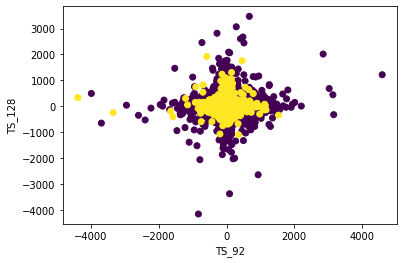

In [21]:


#considering the top 2 features("TS_92" and "TS_128") that are most related to the target output
x1= df[['TS_92']]
x2= df[['TS_128']]
y = df['CLASS']

plt.scatter(x1,x2,c=y)
plt.xlabel('TS_92')
plt.ylabel('TS_128')
plt.show()


**d)The performance of the pipeline can be further improved by trying out different configurations or hyperparameters for the classifier**